## Importing Libraries : 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")

## Question No. 1

####  Consider a periodic square wave with time period T = 2 seconds having magnitude 1 between t = 0 s and t =1s  and zero elsewhere. Let g(t) be the Fourier series representation of the square wave.

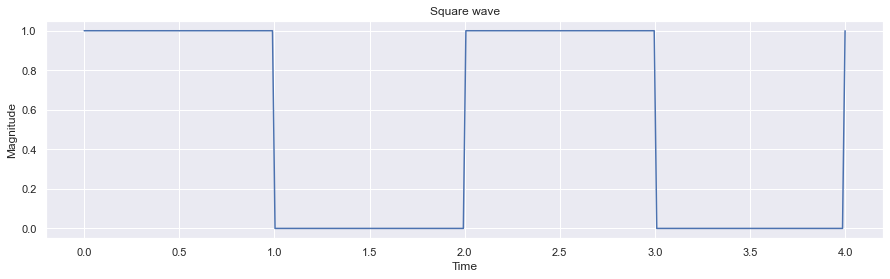

In [2]:
x = np.linspace(0,4.0,300)
lst =[]
for t in x :
    if math.floor(t) % 2 == 0:
        lst.append(1)
    else:
        lst.append(0)
        
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white") 
plt.plot(x,lst)
plt.title("Square wave")
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.show()

###### (a) Define a function so that you can easily plot g(t) for different numbers of coefficients on the same graph.
This plot is useful to see the emergence of the square wave as the number of terms in the representation increases.

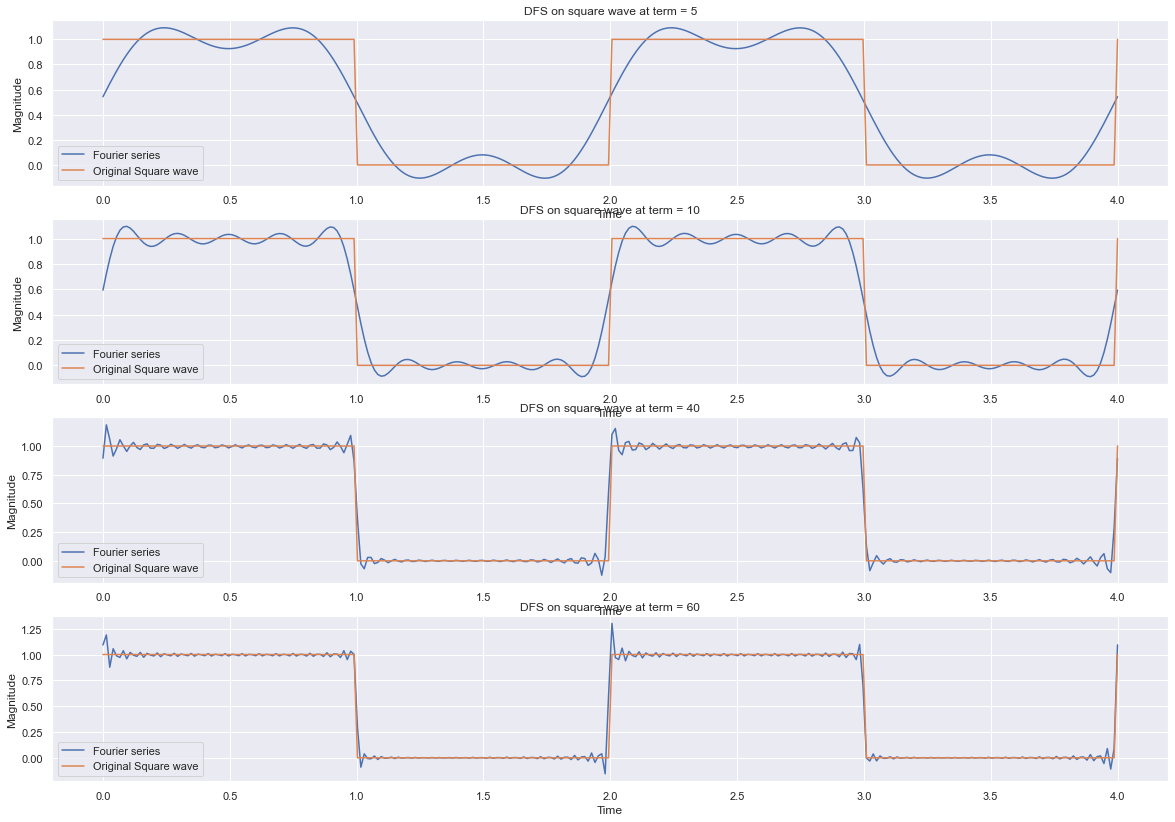

In [3]:
def fs_coeff(terms,T):
    an = []
    bn =[]
    s=[]
    dx = (T+2)/len(x)
    a0=1.0/T*dx*np.sum(lst)
    for k in range(1,terms):
        a_coeff=1.0/T*dx*np.sum(lst*np.cos(2*np.pi*k*x/T))
        an.append(a_coeff)
        b_coeff=1.0/T*dx*np.sum(lst*np.sin(2*np.pi*k*x/T))
        bn.append(b_coeff)
        s.append(a_coeff*np.cos(2*np.pi*k*x/T)+b_coeff*np.sin(2*np.pi*k*x/T))
    ss = a0/2+ sum(s)
    return ss

fourier_series= [fs_coeff(5,2),fs_coeff(10,2),fs_coeff(40,2),fs_coeff(60,2)]
term = ["5","10","40","60"]
fig, axs = plt.subplots(4,1, figsize=(20,14))
c =1
for k in range(len(fourier_series)):
    plt.subplot(4,1,c)
    plt.plot(x,fourier_series[k],label="Fourier series")
    plt.plot(x,lst,label="Original Square wave")
    plt.title("DFS on square wave at term = "+str(term[k]))
    plt.xlabel("Time")
    plt.ylabel("Magnitude")
    plt.legend()
    c =c+1 


###### (b) What happens to the Gibbs phenomenon when the number of terms becomes large?


In [4]:
print("The Gibbs phenomenon involves both the fact that Fourier sums overshoot at a jump discontinuity, and that this overshoot does not die out as more terms are added to the sum but approaches a finite limit.The value of t where the maximum overshoot is achieved moves closer and closer to the discontinuity as the number of terms summed increases.")
 
print("\n the Gibbs phenomenon is the step response of a low-pass filter, and the oscillations are called ringing. Truncating the Fourier series of a periodic signal corresponds to filtering out the higher frequencies by an ideal (brick-wall) low-pass filter. This can be represented as convolution of the original signal with the impulse response of the filter, which is the sinc function. Thus, here the Gibbs phenomenon can be seen as the result of convolving a rectangular function with a sinc function: the oscillations in the sinc function cause the ripples in the output.")

The Gibbs phenomenon involves both the fact that Fourier sums overshoot at a jump discontinuity, and that this overshoot does not die out as more terms are added to the sum but approaches a finite limit.The value of t where the maximum overshoot is achieved moves closer and closer to the discontinuity as the number of terms summed increases.

 the Gibbs phenomenon is the step response of a low-pass filter, and the oscillations are called ringing. Truncating the Fourier series of a periodic signal corresponds to filtering out the higher frequencies by an ideal (brick-wall) low-pass filter. This can be represented as convolution of the original signal with the impulse response of the filter, which is the sinc function. Thus, here the Gibbs phenomenon can be seen as the result of convolving a rectangular function with a sinc function: the oscillations in the sinc function cause the ripples in the output.


## Question No. 2 

####  A signal is given as x(t) = cos2πf t where f = 30 Hz. The signal is sampled at 100 times per second for 0.99 seconds and then its DFT is computed.

In [5]:
def DFT(x,n):
    x_k =[]
    for k in range(len(x)):
        count = 0 
        for n in range(len(x)):
            count = count + x[n]*(np.exp(-1j*((2*np.pi)/len(x))*k*n))
        x_k.append(count)
    return np.asarray(x_k)

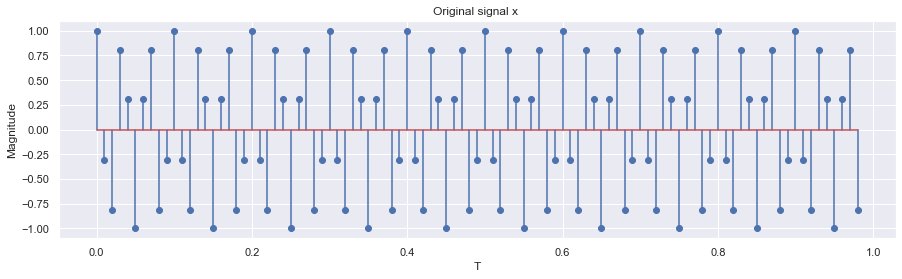

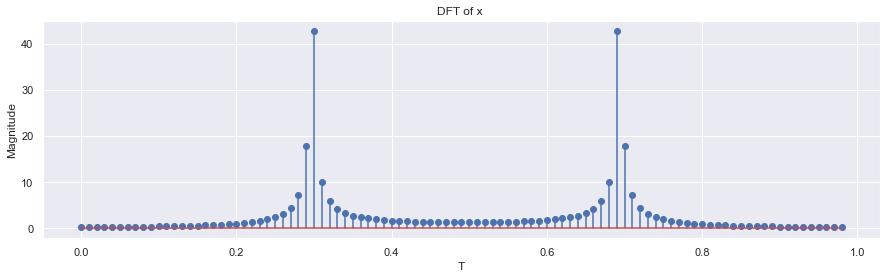

In [6]:
f = 30 
fs = 100
T = 0.99
N = T*fs

t_win = np.arange(0,T,1/fs)
x_win = np.cos(2*np.pi*f*t_win)

fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white") 
plt.stem(t_win,x_win)
plt.title("Original signal x ")
plt.xlabel("T")
plt.ylabel("Magnitude")

dft_x = abs(DFT(x_win,len(x_win)))

fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white") 
plt.stem(t_win,dft_x)
plt.title("DFT of x ")
plt.xlabel("T")
plt.ylabel("Magnitude")
plt.show()

###### (a) Plot the power spectral density and visualize the Spectral Leakage

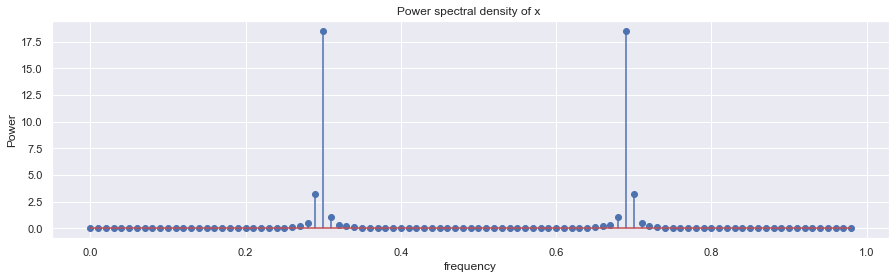

In [7]:
psd = (1/len(x_win))*(abs(dft_x)**2)
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white") 
plt.stem(t_win,psd)
plt.title('Power spectral density of x ')
plt.xlabel("frequency")
plt.ylabel("Power")
plt.show()

###### (b)  Using various window functions such as Hanning, Hamming, Bartlett etc. try to minimize the Spectral Leakage. Show the plots in each case.


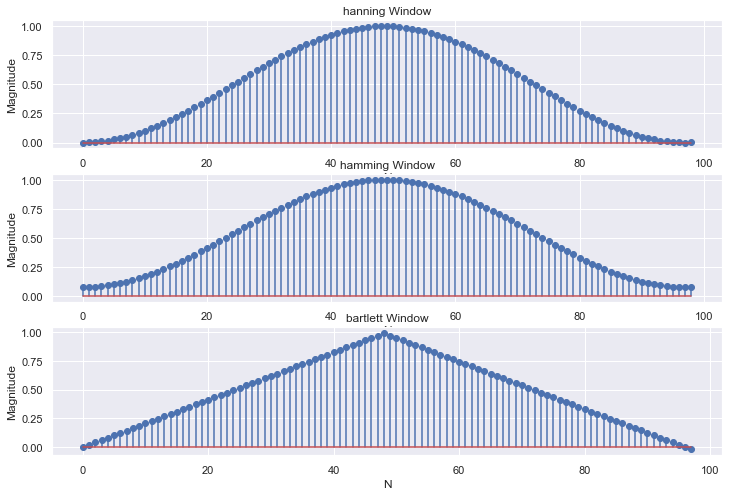

In [8]:
def hanning(n,N):
    hann = 0.5 - 0.5*(np.cos(2*np.pi*n/(N-1)))
    return hann

def hamming(n,N):
    hamm = 0.5386 - 0.46164*(np.cos(2*np.pi*n/(N-1)))
    return hamm

def bartlett(n,N):
    bart =[]
    for i in n :
        if 0<=i<=N/2-1:
            a = 2*i/(N-1)
            bart.append(a)
        if N/2<=i<=N:
            b = 2- 2*i/(N-1)
            bart.append(b)
    return bart

N = 99
n = np.linspace(0,N,N)
window = [hanning(n,N),hamming(n,N),bartlett(n,N)]
name = ["hanning","hamming","bartlett"]
fig, axs = plt.subplots(3,1, figsize=(12,8))
c =1
for k in range(len(window)):
    plt.subplot(3,1,c)
    plt.stem(window[k])
    plt.title(str(name[k])+" Window")
    plt.xlabel("N")
    plt.ylabel("Magnitude")
    c =c+1 


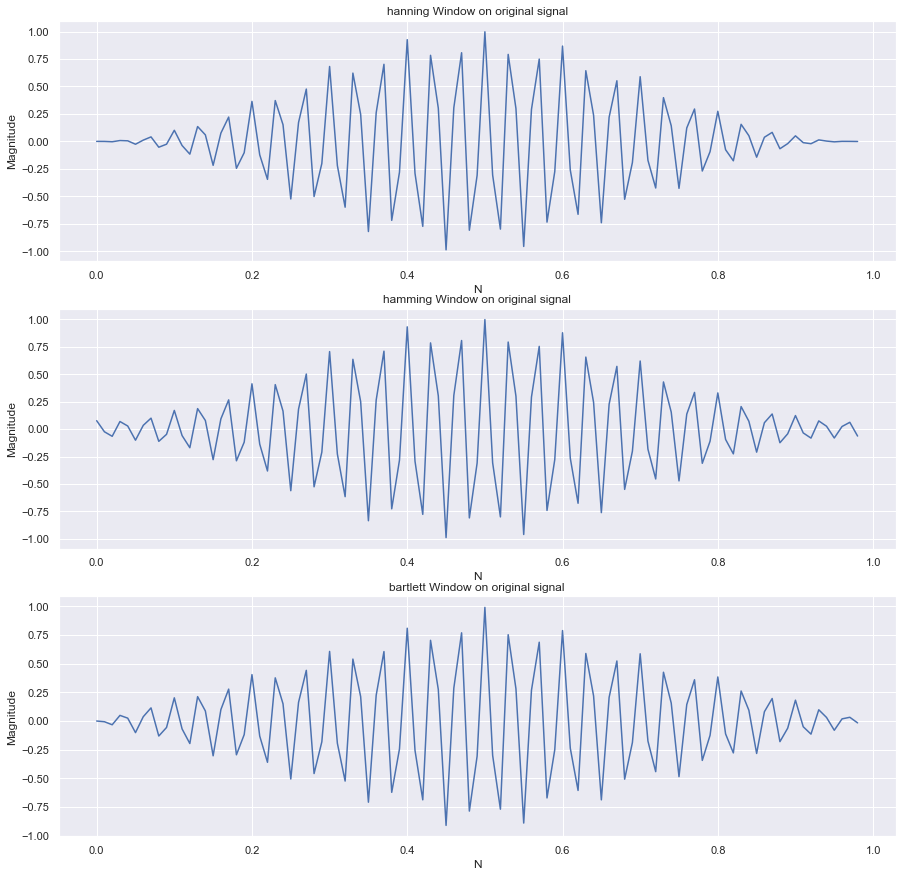

In [9]:
N = len(x_win)
n = np.linspace(0,N,N)
hann = hanning(n,N)
hamm = hamming(n,N)
bart = bartlett(n,N+2)

x_hann = x_win * hann
x_hamm = x_win * hamm
x_bart = x_win * bart

window = [x_hann,x_hamm,x_bart]
name = ["hanning","hamming","bartlett"]
fig, axs = plt.subplots(3,1, figsize=(15,15))
c =1
for k in range(len(window)):
    plt.subplot(3,1,c)
    plt.plot(t_win,window[k])
    plt.title(str(name[k])+" Window on original signal")
    plt.ylabel("Magnitude")
    plt.xlabel("N")
    c =c+1 
    

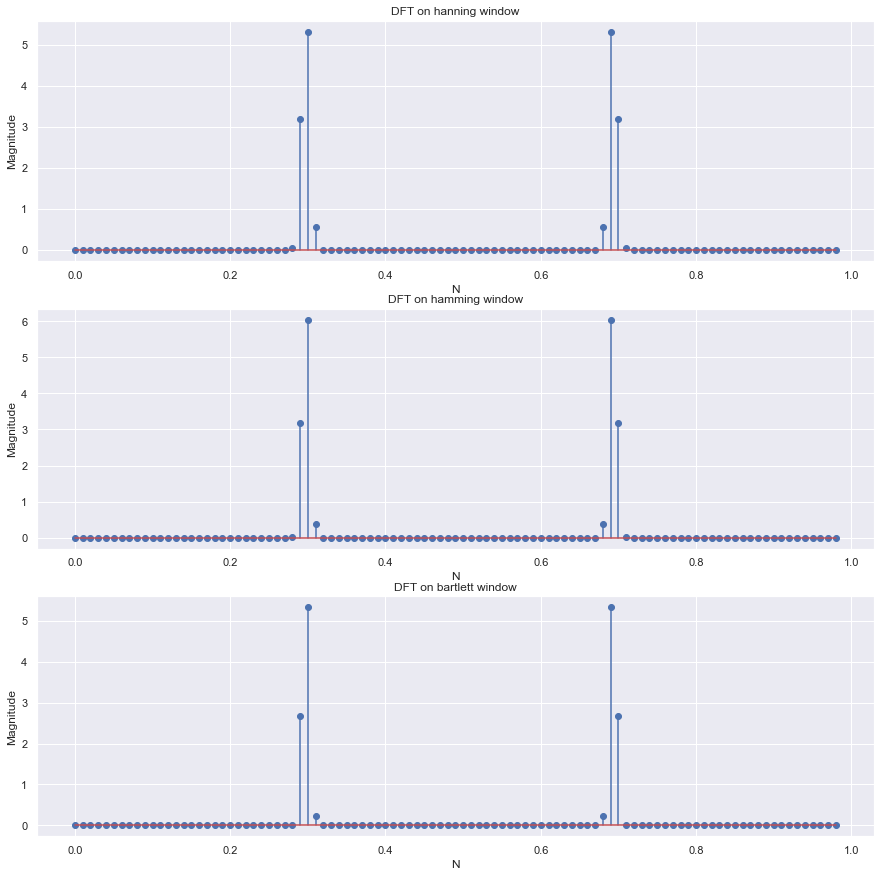

In [10]:
#using psd 
psd_dft_hann = (1/len(x_hann))*(abs((DFT(x_hann,len(x_hann)))**2))
psd_dft_hamm =(1/len(x_hamm))*(abs((DFT(x_hamm,len(x_hamm)))**2))
psd_dft_bart =(1/len(x_bart))*(abs((DFT(x_bart,len(x_bart)))**2)) 

window = [psd_dft_hann,psd_dft_hamm,psd_dft_bart]
name = ["hanning","hamming","bartlett"]
fig, axs = plt.subplots(3,1, figsize=(15,15))
c =1
for k in range(len(window)):
    plt.subplot(3,1,c)
    plt.stem(t_win,window[k])
    plt.title("DFT on "+str(name[k])+" window")
    plt.ylabel("Magnitude")
    plt.xlabel("N")
    c =c+1 

## Question No. 3

#### Consider the signal x(t) = cos(2πf1t) + cos(2πf2t) where f1 = 10 Hz and f2 = 30 Hz. The signal y(t) is the noisy version of x(t) when x(t) is corrupted with white noise having zero mean and unit variance.


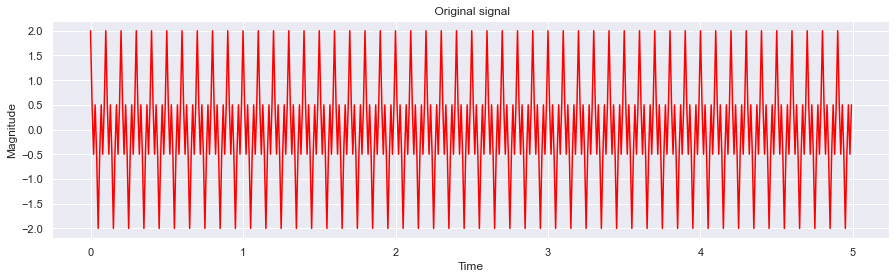

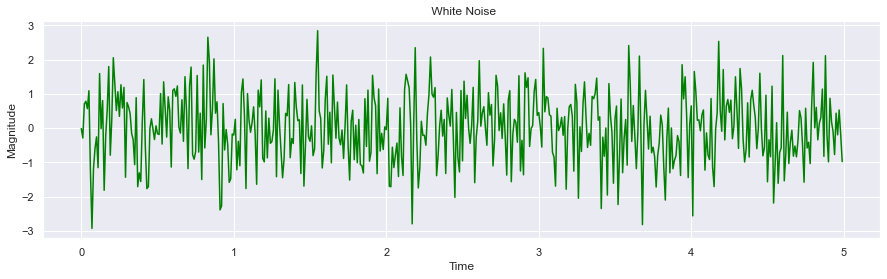

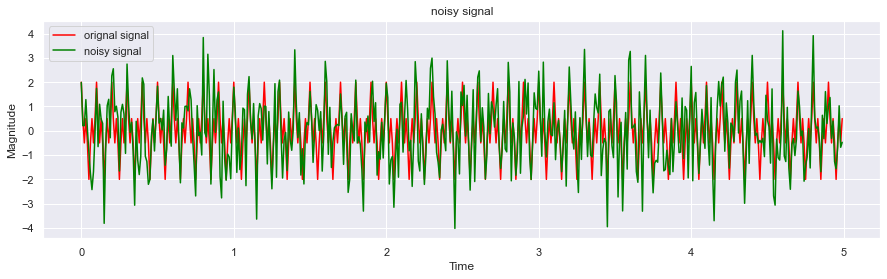

In [11]:
f1 = 10
f2 = 30
t = np.arange(0,5,0.01)
wh_no = np.random.normal(0, 1, size=500)
x = np.cos(2*np.pi*f1*t) + np.cos(2*np.pi*f2*t)
y = x + wh_no

fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white") 
plt.plot(t,x,color='red')
plt.title(" Original signal")
plt.xlabel("Time")
plt.ylabel("Magnitude")

fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white") 
plt.plot(t,wh_no,color='green')
plt.title(" White Noise")
plt.xlabel("Time")
plt.ylabel("Magnitude")

fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white") 
plt.plot(t,x,color='red',label='orignal signal')
plt.plot(t,y,color='green',label='noisy signal')
plt.title("noisy signal")
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

###### (a) Find the power spectral density of y(t) and show a labelled plot.

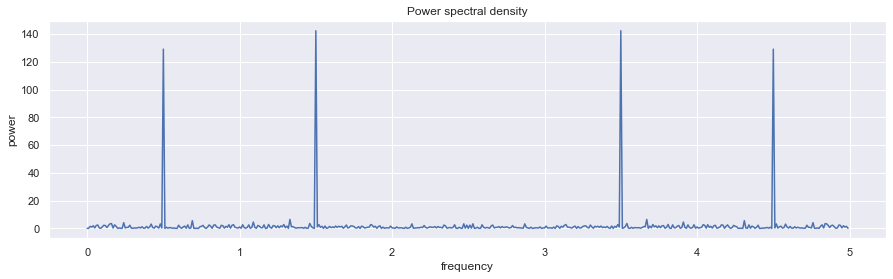

In [15]:
dft_y = DFT(y,len(t))
psd_y = (1/len(t))*(abs(dft_y)**2)
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white") 
plt.plot(t,psd_y)
plt.title('Power spectral density')
plt.xlabel("frequency")
plt.ylabel("power")
plt.show()

###### (b)  From the PSD, find a suitable threshold for denoising the signal.

In [16]:
threshold = psd_y>100
thr_y= psd_y*threshold

###### (c) Recover x(t) from y(t) using the threshold. Show the necessary plots.

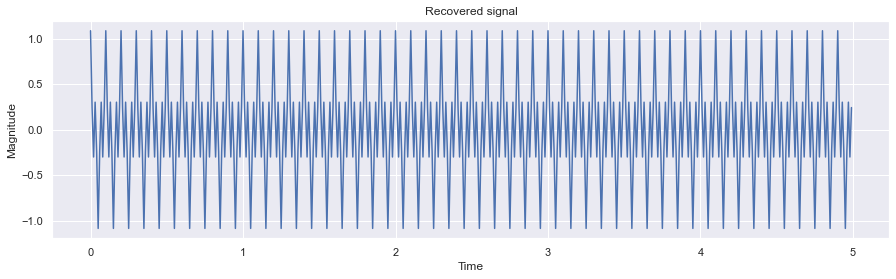

In [17]:
def IDFT(x,n):
    x_n=[]
    for k in range(len(x)):
        count = 0
        for i in range(len(x)):
            count = count + x[i]*(np.exp(1j*((2*np.pi)/len(x))*k*i))
        x_n.append(count/len(x))
    return np.asarray(x_n)

recover = IDFT(thr_y,len(thr_y))

fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white") 
plt.plot(t,recover)
plt.title('Recovered signal')
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.show()